# BEFORE RUNNING THIS NOTEBOOK MAKE SURE THAT YOU CREATE cities and cities1 FOLDERS IN sample_data folder

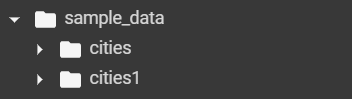

**Sample Image**

Install the wikipedia Module


In [ ]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp37-none-any.whl size=11686 sha256=49107bf0f1df181efb96143af3d1eede0b8fec6110bcfb553f6a18f9b80fe201
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [ ]:
import wikipedia

**This cell is for importing dataset. Make sure to set the path accordingly while running the cell**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Final 1000cities with links - Final 1000cities with links.csv')

In [ ]:
df.head()

,S.NO,city_links,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population
0,1,https://en.wikipedia.org/wiki/Tokyo,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,T?ky?,primary,37977000.0
1,2,https://en.wikipedia.org/wiki/Jakarta,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0
2,3,https://en.wikipedia.org/wiki/New_Delhi,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0
3,4,https://en.wikipedia.org/wiki/Mumbai,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mah?r?shtra,admin,23355000.0
4,5,https://en.wikipedia.org/wiki/Manila,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0


A sample visualisation of extraction of city name from the wiki article link

In [ ]:
df['city_links'][0].split('/')[-1]

'Tokyo'

In [ ]:
s1 = "https://en.wikipedia.org/w/index.php?title="+df['city_links'][0].split('/')[-1]+"&action=edit&action=raw"

cl and cn are 2 lests representing city names and city links respectively

In [ ]:
cl = list(df['city_links'])
cn = list(df['city_ascii'])

In [ ]:
import requests
cities = []
for j in range(len(list(df['city_links']))):                                    #Iterate through all the cities in the data frame
  with requests.Session() as s:
      try:
        print(cn[j])
        s1 = "https://en.wikipedia.org/w/index.php?title="+(cl[j]).split('/')[-1]+"&action=edit&action=raw"     #Createthe url by replacing exsting one with the cityname
        utf_8 = s.get(s1)                                                       #Extracting the template using requests function
        a1 = utf_8.text                                                         #converting the template response int text format
        i = int(a1.find("Infobox "))                                            #Identifying the Infobox in template
        l1 = i-2                                                                #Intializing a start pointer for writing template into new file
        st = ['{','{']                                                          #st can be visualised as a stack that verifies for valid parenthesis
        while(len(st)>0):                                                       #This loop runs untill the parenthesis corresponding to infobox is closed
          if(a1[i]=='{'):
            st.append('{')
          if(a1[i]=='}'):
            st.pop()
          i = i +1
        l2 = int(i)                                                             #The end pointer of infobox is stored in l2
        with open('/content/sample_data/cities/'+cn[j]+'.txt','w') as f:        #All the files are created and written into cities folder
          f.writelines(utf_8.text[l1:l2])
      except:                                                                   #Few templates comprise errors and few wiki links may be wrong hence they raise errors
        cities.append([cn[j],cl[j]])                                            #The cities that raised errors are added to this list

Tokyo
Jakarta
Delhi
Mumbai
Manila
Shanghai
Sao Paulo
Seoul
Mexico City
Guangzhou
Beijing
Cairo
New York
Kolkata
Moscow
Bangkok
Buenos Aires
Shenzhen
Dhaka
Lagos
Istanbul
Osaka
Karachi
Bangalore
Tehran
Kinshasa
Ho Chi Minh City
Los Angeles
Rio de Janeiro
Nanyang
Chennai
Chengdu
Lahore
Paris
London
Linyi
Tianjin
Shijiazhuang
Baoding
Zhoukou
Lima
Hyderabad
Bogota
Weifang
Nagoya
Wuhan
Heze
Ganzhou
Tongshan
Chicago
Handan
Luanda
Fuyang
Kuala Lumpur
Jining
Dongguan
Hanoi
Pune
Chongqing
Changchun
Zhumadian
Ningbo
Onitsha
Nanjing
Hefei
Ahmadabad
Hong Kong
Khartoum
Nantong
Yancheng
Foshan
Nanning
Hengyang
Xi'an
Shenyang
Tangshan
Shaoyang
Changsha
Santiago
Zhengzhou
Zhanjiang
Riyadh
Cangzhou
Dar es Salaam
Maoming
Huanggang
Xinyang
Shangrao
Luoyang
Bijie
Yantai
Quanzhou
Hangzhou
Miami
Kunming
Nanchong
Zunyi
Lu'an
Yichun
Taizhou
Liaocheng
Qujing
Xiangyang
Surat
Baghdad
Qingdao
Singapore
Dallas
Changde
Dazhou
Suzhou
Philadelphia
Jieyang
Nairobi
Ankara
Tai'an
Yulin
Dezhou
Houston
Atlanta
Rangoon
Tor

In [ ]:
len(cities) #count of cities that raised errors

22

In [ ]:
cities

[['Lagos', 'https://en.wikipedia.org/wiki/Lagos'],
 ['Los Angeles', 'https://en.wikipedia.org/wiki/Los_Angeles'],
 ['Riyadh', 'https://en.wikipedia.org/wiki/Riyadh'],
 ['Kano', 'https://en.wikipedia.org/wiki/Kano'],
 ['Sanzhou', 'https://en.wikipedia.org/wiki/Sancho'],
 ['Leizhou', 'https://en.wikipedia.org/wiki/Leizhou_Peninsula'],
 ['Owerri', 'https://en.wikipedia.org/wiki/Owerri'],
 ['Guarulhos',
  'https://en.wikipedia.org/wiki/S%C3%A3o_Paulo/Guarulhos_International_Airport'],
 ['Providence', 'https://en.wikipedia.org/wiki/Eye_of_Providence'],
 ['Ogbomoso', 'https://en.wikipedia.org/wiki/Ogbomosho'],
 ['Niamey', 'https://en.wikipedia.org/wiki/Niamey'],
 ['Rotterdam', 'https://en.wikipedia.org/wiki/Rotterdam'],
 ['Kingston', 'https://en.wikipedia.org/wiki/Kingston,_Jamaica'],
 ['Porto-Novo', 'https://en.wikipedia.org/wiki/Porto-Novo'],
 ['Dili', 'https://en.wikipedia.org/wiki/Dili'],
 ['Kitaku', 'https://en.wikipedia.org/wiki/Kita-ku,_Osaka'],
 ['Olinda', 'https://en.wikipedia.org/w

**This cell is for cities that rasied errors**

In [ ]:
import requests
cities1 = []
for j in range(len(cities)):
  with requests.Session() as s:
      try:
        print(cities[j][0])
        s1 = "https://en.wikipedia.org/w/index.php?title="+(cities[j][1]).split('/')[-1]+"&action=edit&action=raw"
        utf_8 = s.get(s1)
        a1 = utf_8.text
        i = int(a1.find("{{Infobox "))
        l1 = i
        if i<0:
          raise
        st = ['{']
        n1 = a1.find("'''"+(cities[j][1]).split('/')[-1][0])
        while(len(st)>0 and i<n1):
          if(a1[i:i+2]=='{{'):
            # print(a1[i:i+10],st)
            st.append('{')
          if(a1[i:i+2]=='}}'):
            # print(a1[i:i+10],st)
            st.pop()
          i = i +1
        l2 = int(i)
        with open('/content/sample_data/cities1/'+cities[j][0]+'.txt','w') as f:
          f.writelines(utf_8.text[l1:l2])
      except:
        cities1.append([cities[j]])

Lagos
Los Angeles
Riyadh
Kano
Sanzhou
Leizhou
Owerri
Guarulhos
Providence
Ogbomoso
Niamey
Rotterdam
Kingston
Porto-Novo
Dili
Kitaku
Olinda
Liverpool
Warri
Rongjiawan
Puxi
Kaduna


**Even after filtering twice we find that that few cities raise error. These cities need to be handled manually**

In [ ]:
cities1

[[['Sanzhou', 'https://en.wikipedia.org/wiki/Sancho']],
 [['Leizhou', 'https://en.wikipedia.org/wiki/Leizhou_Peninsula']],
 [['Guarulhos',
   'https://en.wikipedia.org/wiki/S%C3%A3o_Paulo/Guarulhos_International_Airport']],
 [['Providence', 'https://en.wikipedia.org/wiki/Eye_of_Providence']],
 [['Kitaku', 'https://en.wikipedia.org/wiki/Kita-ku,_Osaka']],
 [['Rongjiawan', 'https://en.wikipedia.org/wiki/Rongjiawan']],
 [['Puxi', 'https://en.wikipedia.org/wiki/Puxi']]]